In [1]:
#import packages
library(tidyverse)
library(ggplot2)
library(grid)
library(GGally)
library(gridExtra)

-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [2]:
#import data
df <- read.csv("train.csv")

In [3]:
#examine data
head(df)

,Patient_Id,Patient_Age,Genes_in_mother_s_side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count__mcL_,Patient_First_Name,Family_Name,Father_s_name,...,Birth_defects,White_Blood_cell_count__thousand_per_microliter_,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,...,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,PID0x8ce3,11,No,No,Yes,No,5.209058,Willie,Camacho,Tr,...,Multiple,6.669552,slightly abnormal,1,1,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
2,PID0x8660,4,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,...,Multiple,6.397702,abnormal,0,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x74ab,1,Yes,Yes,No,No,4.612265,Eric,Harness,Mano,...,Singular,7.995115,slightly abnormal,1,1,0,1,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x7678,6,Yes,No,Yes,No,4.620420,Ruth,Homza,Cesareo,...,Multiple,3.000000,slightly abnormal,1,0,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
5,PID0x952d,10,Yes,Yes,Yes,No,4.751452,James,Whipple,Dvon,...,Singular,9.382407,abnormal,1,1,0,0,0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
6,PID0x6d89,6,No,Yes,Yes,Yes,4.876896,Miguel,Canada,Zykevious,...,Singular,7.370477,normal,1,0,0,0,0,Single-gene inheritance diseases,Hemochromatosis


In [4]:
#dataframe structure
str(df)

'data.frame':	6706 obs. of  45 variables:
 $ Patient_Id                                      : chr  "PID0x8ce3" "PID0x8660" "PID0x74ab" "PID0x7678" ...
 $ Patient_Age                                     : int  11 4 1 6 10 6 10 4 8 1 ...
 $ Genes_in_mother_s_side                          : chr  "No" "No" "Yes" "Yes" ...
 $ Inherited_from_father                           : chr  "No" "Yes" "Yes" "No" ...
 $ Maternal_gene                                   : chr  "Yes" "Yes" "No" "Yes" ...
 $ Paternal_gene                                   : chr  "No" "Yes" "No" "No" ...
 $ Blood_cell_count__mcL_                          : num  5.21 4.75 4.61 4.62 4.75 ...
 $ Patient_First_Name                              : chr  "Willie" "John" "Eric" "Ruth" ...
 $ Family_Name                                     : chr  "Camacho" "Sandoval" "Harness" "Homza" ...
 $ Father_s_name                                   : chr  "Tr" "Gregori" "Mano" "Cesareo" ...
 $ Mother_s_age                                    : 

In [5]:
#columns not necessary for further calculations
drop <- c("Patient_Id","Patient_First_Name","Family_Name"
          ,"Father_s_name","Institute_Name","Location_of_Institute","Parental_consent","Place_of_birth")
df = df[,!(names(df) %in% drop)]

In [6]:
#summary statistics
summary(df)

  Patient_Age     Genes_in_mother_s_side Inherited_from_father
 Min.   : 0.000   Length:6706            Length:6706          
 1st Qu.: 3.000   Class :character       Class :character     
 Median : 7.000   Mode  :character       Mode  :character     
 Mean   : 6.916                                               
 3rd Qu.:11.000                                               
 Max.   :14.000                                               
 Maternal_gene      Paternal_gene      Blood_cell_count__mcL_  Mother_s_age  
 Length:6706        Length:6706        Min.   :4.146          Min.   :18.00  
 Class :character   Class :character   1st Qu.:4.767          1st Qu.:26.00  
 Mode  :character   Mode  :character   Median :4.900          Median :35.00  
                                       Mean   :4.901          Mean   :34.64  
                                       3rd Qu.:5.036          3rd Qu.:43.00  
                                       Max.   :5.610          Max.   :51.00  
  Father_s_ag

In [7]:
#better summary statistics for numeric columns
numeric_columns <- sapply(df, is.numeric)
sapply(df[, numeric_columns], function(x) summary(x))

,Patient_Age,Blood_cell_count__mcL_,Mother_s_age,Father_s_age,Test_1,Test_2,Test_3,Test_4,Test_5,No._of_previous_abortion,White_Blood_cell_count__thousand_per_microliter_,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
Min.,0.000000,4.146230,18.00000,20.00000,0,0,0,1,0,0.000000,3.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
1st Qu.,3.000000,4.766541,26.00000,31.00000,0,0,0,1,0,1.000000,5.355176,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
Median,7.000000,4.899961,35.00000,42.00000,0,0,0,1,0,2.000000,7.366643,1.0000000,1.0000000,1.0000000,1.0000000,0.0000000
Mean,6.915896,4.900562,34.64002,41.98539,0,0,0,1,0,1.998807,7.419240,0.5890248,0.5495079,0.5390695,0.5013421,0.4704742
3rd Qu.,11.000000,5.036320,43.00000,53.00000,0,0,0,1,0,3.000000,9.439492,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
Max.,14.000000,5.609829,51.00000,64.00000,0,0,0,1,0,4.000000,12.000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000


In [8]:
#columns with no variance
drop <- c("Test_1","Test_2","Test_3","Test_4","Test_5")
sapply(df[, drop], function(x) summary(x))
df = df[,!(names(df) %in% drop)]

,Test_1,Test_2,Test_3,Test_4,Test_5
Min.,0,0,0,1,0
1st Qu.,0,0,0,1,0
Median,0,0,0,1,0
Mean,0,0,0,1,0
3rd Qu.,0,0,0,1,0
Max.,0,0,0,1,0


In [9]:
head(df)
tail(df)

,Patient_Age,Genes_in_mother_s_side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count__mcL_,Mother_s_age,Father_s_age,Status,Respiratory_Rate__breaths_min_,...,Birth_defects,White_Blood_cell_count__thousand_per_microliter_,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,...,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,11,No,No,Yes,No,5.209058,45,44,Alive,Tachypnea,...,Multiple,6.669552,slightly abnormal,1,1,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
2,4,No,Yes,Yes,Yes,4.752272,44,42,Alive,Tachypnea,...,Multiple,6.397702,abnormal,0,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
3,1,Yes,Yes,No,No,4.612265,50,56,Deceased,Normal (30-60),...,Singular,7.995115,slightly abnormal,1,1,0,1,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,6,Yes,No,Yes,No,4.620420,41,20,Alive,Tachypnea,...,Multiple,3.000000,slightly abnormal,1,0,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
5,10,Yes,Yes,Yes,No,4.751452,40,57,Deceased,Normal (30-60),...,Singular,9.382407,abnormal,1,1,0,0,0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
6,6,No,Yes,Yes,Yes,4.876896,36,48,Deceased,Tachypnea,...,Singular,7.370477,normal,1,0,0,0,0,Single-gene inheritance diseases,Hemochromatosis


,Patient_Age,Genes_in_mother_s_side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count__mcL_,Mother_s_age,Father_s_age,Status,Respiratory_Rate__breaths_min_,...,Birth_defects,White_Blood_cell_count__thousand_per_microliter_,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,...,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
6701,7,No,No,No,No,4.713334,27,56,Alive,Normal (30-60),...,Singular,9.342662,normal,1,1,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
6702,12,Yes,No,Yes,No,4.652915,49,40,Alive,Normal (30-60),...,Multiple,8.035952,slightly abnormal,0,1,1,1,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
6703,6,No,Yes,No,Yes,5.117296,48,27,Alive,Tachypnea,...,Singular,3.453291,slightly abnormal,0,0,1,1,0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
6704,13,No,Yes,No,Yes,4.777036,27,58,Alive,Normal (30-60),...,Singular,3.000736,normal,0,0,0,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
6705,4,Yes,No,No,No,5.077554,44,34,Deceased,Normal (30-60),...,Singular,9.566549,inconclusive,1,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
6706,11,Yes,No,No,No,4.738067,32,62,Deceased,Normal (30-60),...,Singular,11.188371,normal,1,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes


In [10]:
#dimension of our df
dim(df)

[1] 6706   32

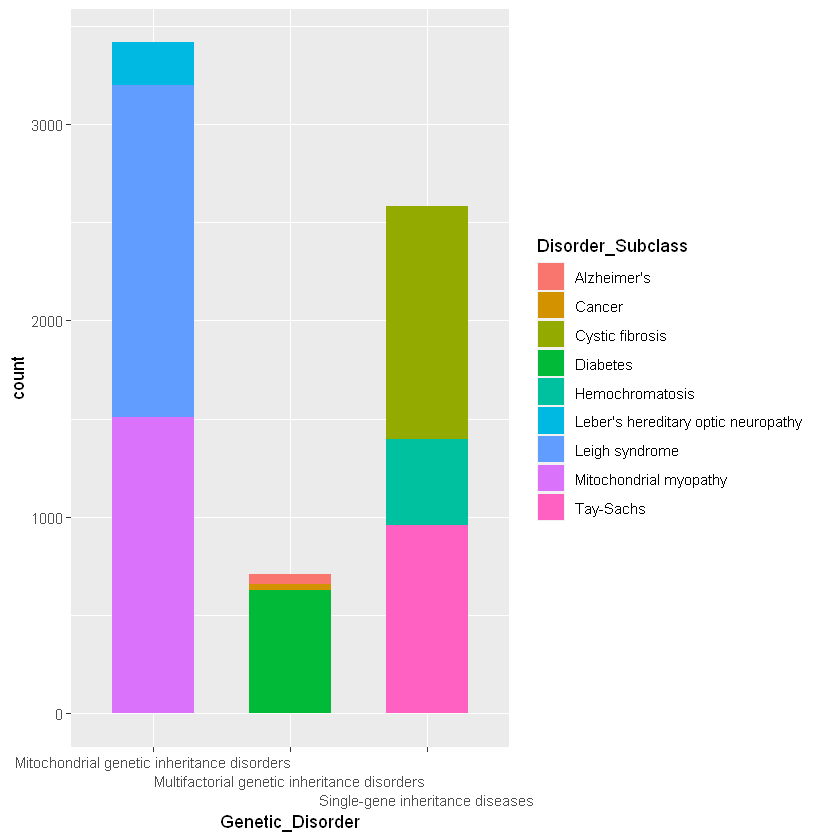

In [11]:
#Genetic Disorder depends upon disorder_subclass
ggplot(data = df, aes(Genetic_Disorder,fill = Disorder_Subclass)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

In [12]:
df <- df[, !names(df) %in% 'Genetic_Disorder']

In [13]:
head(df)

,Patient_Age,Genes_in_mother_s_side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count__mcL_,Mother_s_age,Father_s_age,Status,Respiratory_Rate__breaths_min_,...,No._of_previous_abortion,Birth_defects,White_Blood_cell_count__thousand_per_microliter_,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Disorder_Subclass
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,...,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
1,11,No,No,Yes,No,5.209058,45,44,Alive,Tachypnea,...,0,Multiple,6.669552,slightly abnormal,1,1,1,0,1,Leigh syndrome
2,4,No,Yes,Yes,Yes,4.752272,44,42,Alive,Tachypnea,...,1,Multiple,6.397702,abnormal,0,0,1,1,1,Diabetes
3,1,Yes,Yes,No,No,4.612265,50,56,Deceased,Normal (30-60),...,0,Singular,7.995115,slightly abnormal,1,1,0,1,0,Leigh syndrome
4,6,Yes,No,Yes,No,4.620420,41,20,Alive,Tachypnea,...,3,Multiple,3.000000,slightly abnormal,1,0,1,0,1,Leigh syndrome
5,10,Yes,Yes,Yes,No,4.751452,40,57,Deceased,Normal (30-60),...,3,Singular,9.382407,abnormal,1,1,0,0,0,Mitochondrial myopathy
6,6,No,Yes,Yes,Yes,4.876896,36,48,Deceased,Tachypnea,...,1,Singular,7.370477,normal,1,0,0,0,0,Hemochromatosis


In [14]:
head(df[, c(11:23), drop=FALSE])

,Heart_Rate__rates_min,Follow.up,Gender,Birth_asphyxia,Autopsy_shows_birth_defect__if_applicable_,Folic_acid_details__peri.conceptional_,H_O_serious_maternal_illness,H_O_radiation_exposure__x.ray_,H_O_substance_abuse,Assisted_conception_IVF_ART,History_of_anomalies_in_previous_pregnancies,No._of_previous_abortion,Birth_defects
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,Tachycardia,Low,Male,Yes,Not applicable,Yes,Yes,No,No,No,Yes,0,Multiple
2,Tachycardia,Low,Male,No,Not applicable,Yes,No,No,No,Yes,Yes,1,Multiple
3,Tachycardia,High,Male,Not available,None,Yes,No,Yes,Not applicable,Yes,Yes,0,Singular
4,Tachycardia,High,Male,No,Not applicable,Yes,Yes,Yes,-,No,No,3,Multiple
5,Tachycardia,Low,Ambiguous,No,Yes,No,No,Yes,No,Yes,Yes,3,Singular
6,Normal,Low,Ambiguous,No,Yes,Yes,Yes,No,No,Yes,No,1,Singular


In [15]:
#based on domain information
drop <- c("H_O_radiation_exposure__x.ray_" ,"H_O_substance_abuse")
df = df[,!(names(df) %in% drop)]

In [16]:
#correlation matrix for numeric columns
numeric_columns <- sapply(df, is.numeric)
cor_m <- cor(df[, numeric_columns])
cor_m

,Patient_Age,Blood_cell_count__mcL_,Mother_s_age,Father_s_age,No._of_previous_abortion,White_Blood_cell_count__thousand_per_microliter_,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
Patient_Age,1.000000000,-0.006653421,-0.0148813808,-0.0059193956,0.0042418455,-0.007781066,0.0130329281,0.0114913714,-0.0158018860,-0.006593085,-0.017132163
Blood_cell_count__mcL_,-0.006653421,1.000000000,0.0075838373,0.0128398252,-0.0051184769,0.003946293,0.0171285024,-0.0055507818,-0.0026050526,0.011353858,0.003202254
Mother_s_age,-0.014881381,0.007583837,1.0000000000,-0.0002643414,0.0087098490,0.002801205,-0.0028124617,-0.0001064894,-0.0016055635,-0.019011212,0.013108670
Father_s_age,-0.005919396,0.012839825,-0.0002643414,1.0000000000,-0.0065473979,0.020750606,0.0114420175,-0.0047726788,0.0007586268,-0.005042291,0.004387313
No._of_previous_abortion,0.004241846,-0.005118477,0.0087098490,-0.0065473979,1.0000000000,0.001200279,0.0001533433,0.0041297295,0.0092047560,-0.004658872,-0.003021492
White_Blood_cell_count__thousand_per_microliter_,-0.007781066,0.003946293,0.0028012050,0.0207506057,0.0012002786,1.000000000,-0.0014995659,0.0095486110,-0.0029357173,-0.007945723,-0.012514422
Symptom_1,0.013032928,0.017128502,-0.0028124617,0.0114420175,0.0001533433,-0.001499566,1.0000000000,-0.0021663055,0.0131792639,-0.008668952,0.011917965
Symptom_2,0.011491371,-0.005550782,-0.0001064894,-0.0047726788,0.0041297295,0.009548611,-0.0021663055,1.0000000000,-0.0056946215,0.006926055,0.011590694
Symptom_3,-0.015801886,-0.002605053,-0.0016055635,0.0007586268,0.0092047560,-0.002935717,0.0131792639,-0.0056946215,1.0000000000,0.010559239,0.036102665
Symptom_4,-0.006593085,0.011353858,-0.0190112118,-0.0050422914,-0.0046588724,-0.007945723,-0.0086689516,0.0069260550,0.0105592390,1.000000000,0.030035064


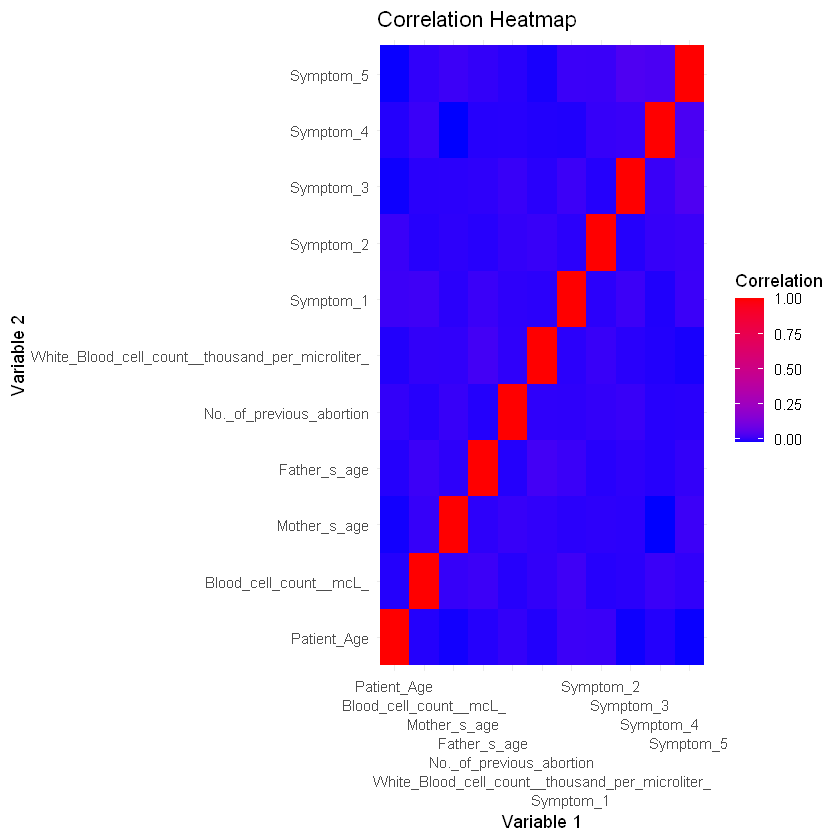

In [17]:
cor_df <- reshape2::melt(cor_m)

# Create the correlation heatmap
ggplot(cor_df, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red", na.value = "white") +
  labs(title = "Correlation Heatmap",
       x = "Variable 1",
       y = "Variable 2",
       fill = "Correlation") +
  scale_x_discrete(guide = guide_axis(n.dodge = 7)) +
  theme_minimal()

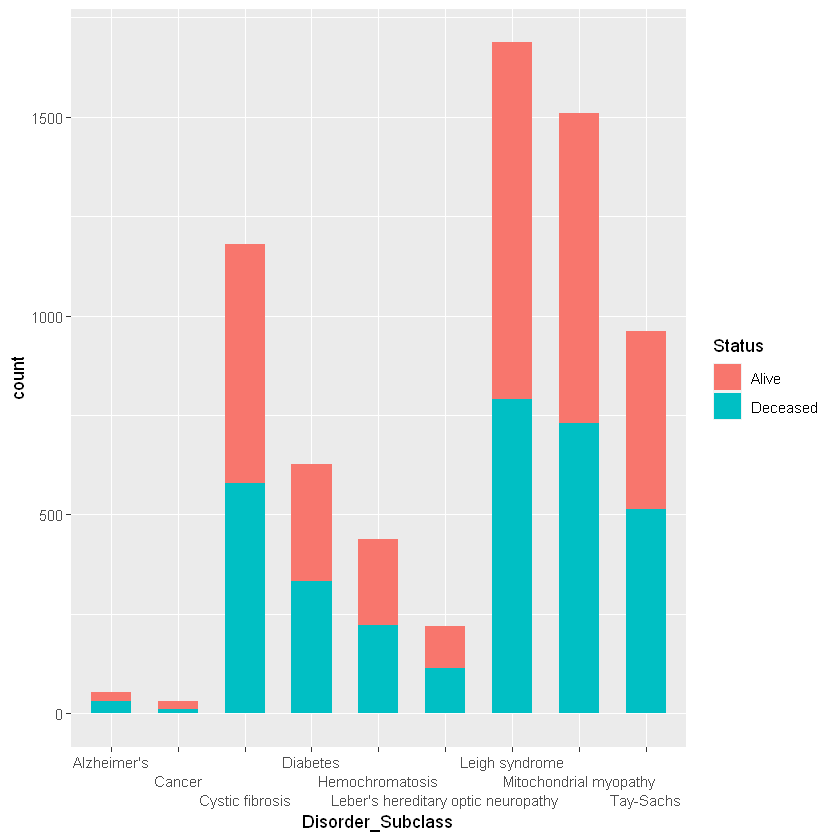

In [18]:
#visualization

ggplot(data = df, aes(Disorder_Subclass,fill =Status )) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(count)` instead."


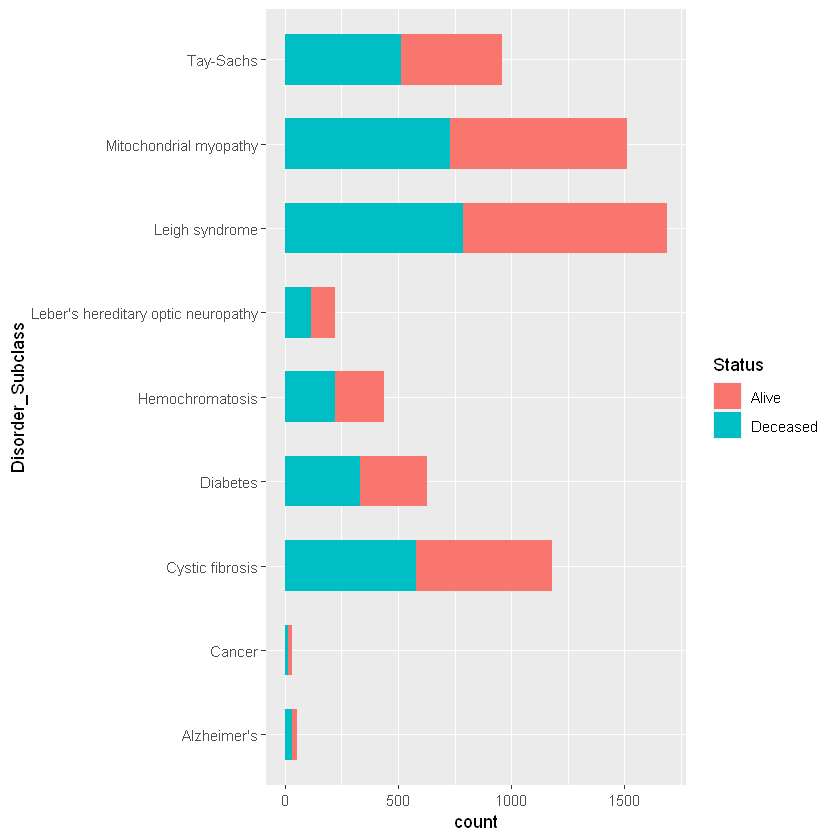

In [19]:
ggplot(df, aes(Disorder_Subclass, fill = Status)) +
  geom_bar(aes(y = ..count..), stat = "count", width = 0.6) +
  coord_flip() 

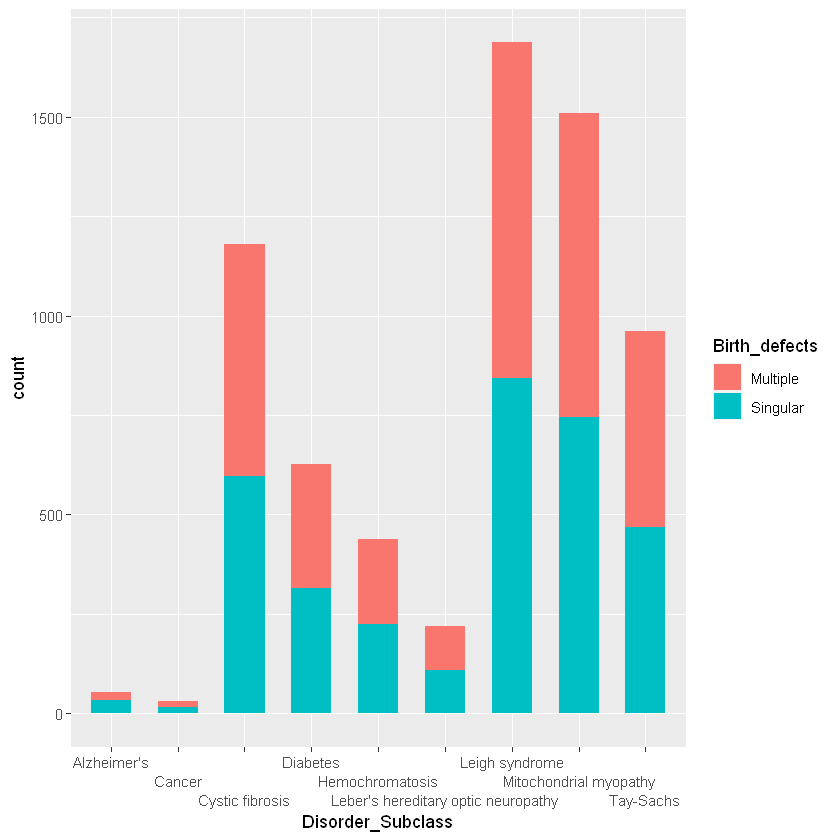

In [20]:
ggplot(data = df, aes(Disorder_Subclass,fill =Birth_defects )) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

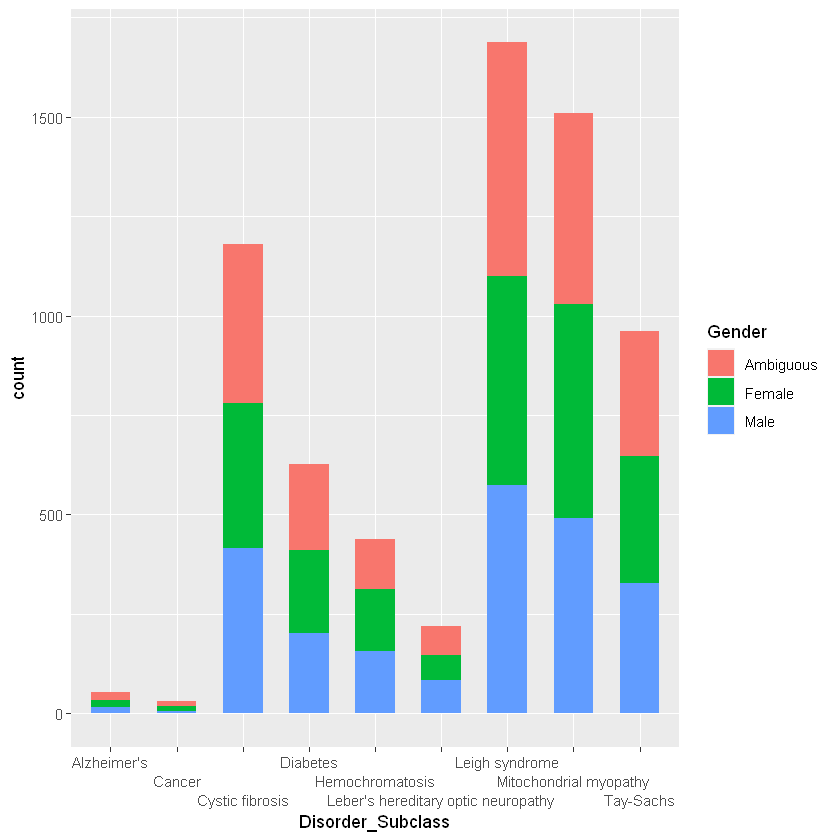

In [21]:
ggplot(data = df, aes(Disorder_Subclass,fill = Gender)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

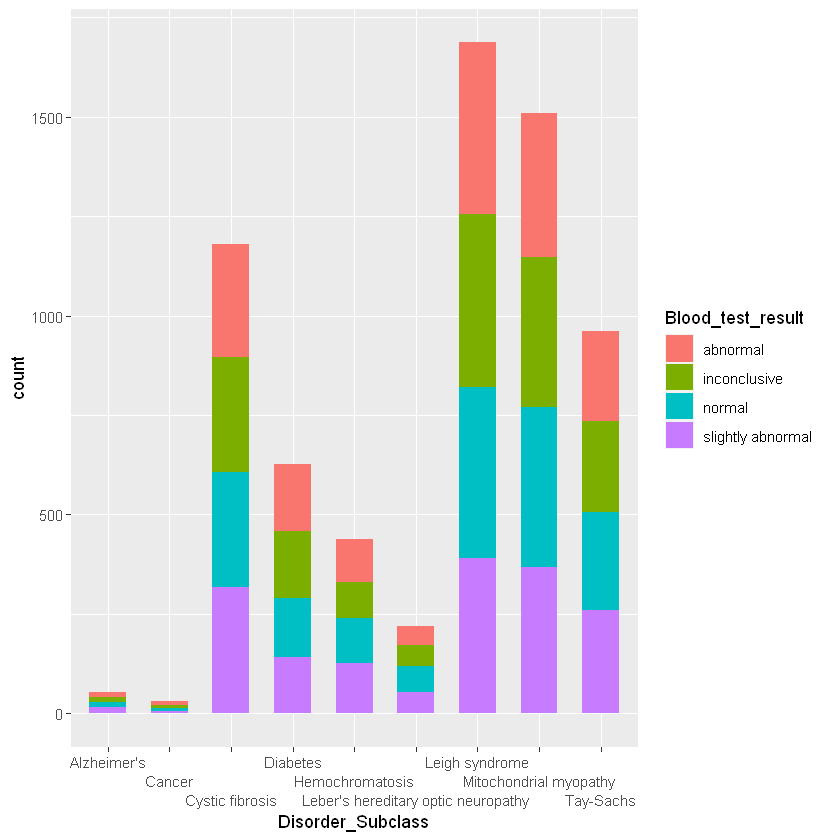

In [22]:
ggplot(data = df, aes( Disorder_Subclass ,fill =Blood_test_result )) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

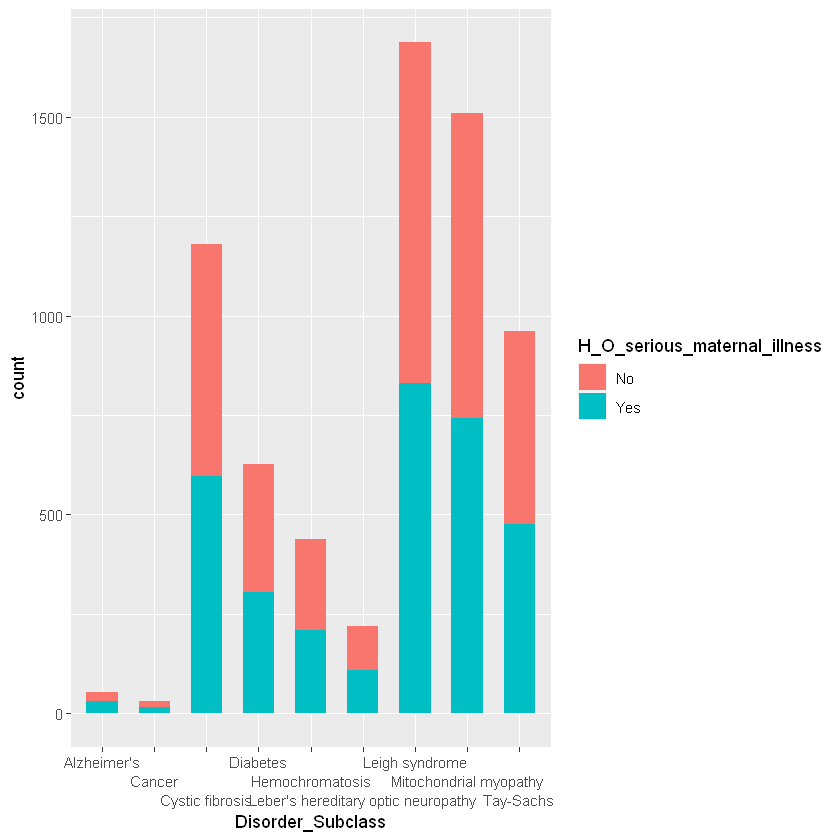

In [23]:
#df <- df[!apply(df, 1, function(row) any(row %in% c("not applicable", "NA"))), ]

ggplot(data = df, aes( Disorder_Subclass ,fill =H_O_serious_maternal_illness )) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

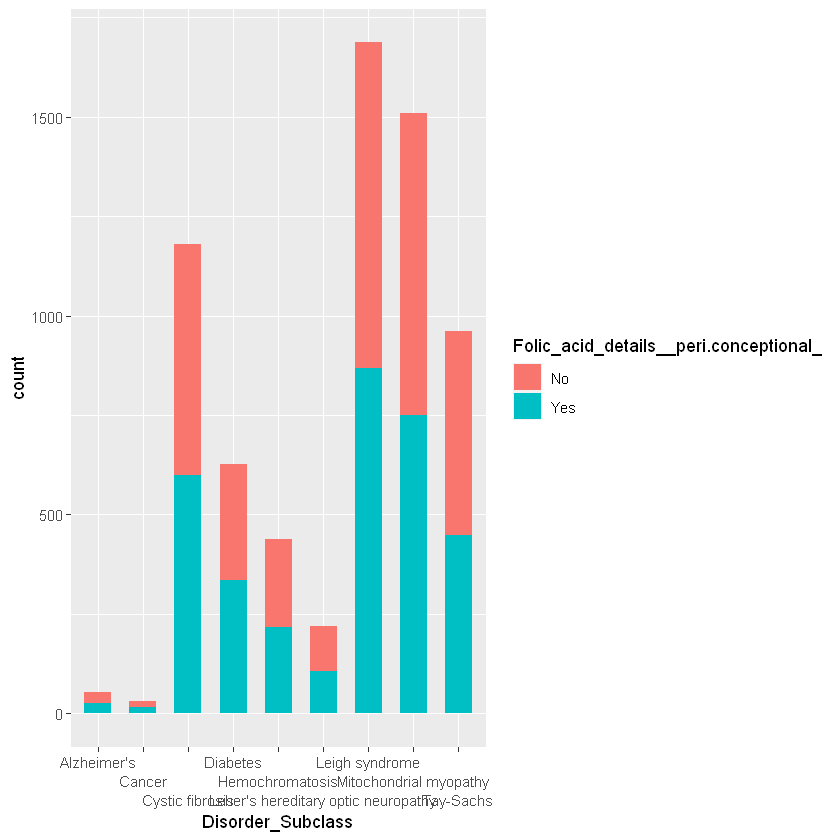

In [24]:

ggplot(data = df, aes( Disorder_Subclass ,fill =Folic_acid_details__peri.conceptional_ )) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

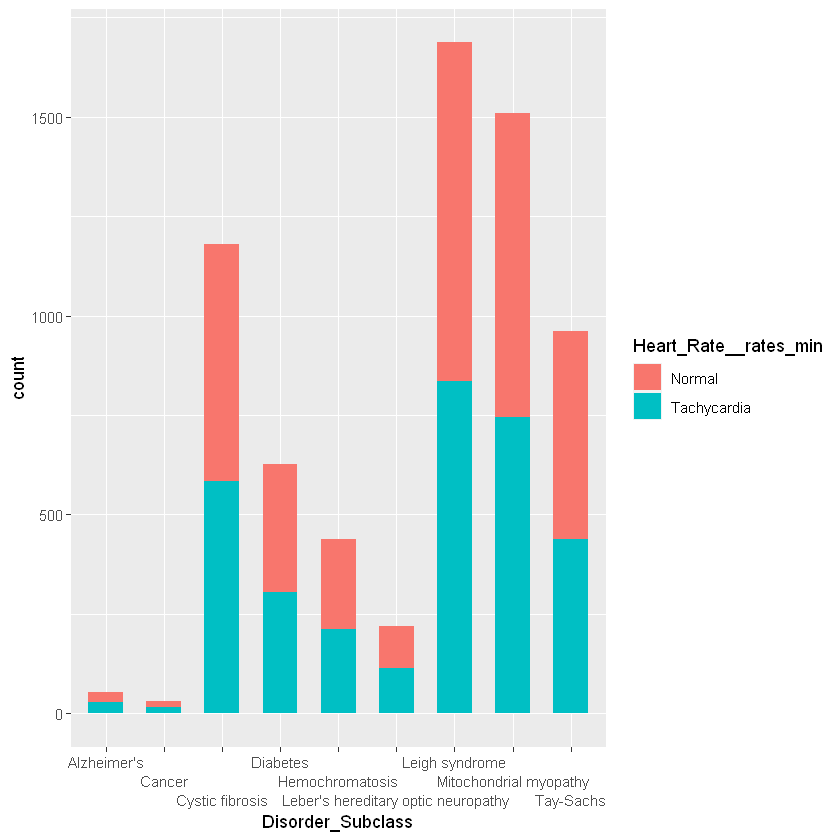

In [25]:

ggplot(data = df, aes( Disorder_Subclass ,fill = Heart_Rate__rates_min )) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

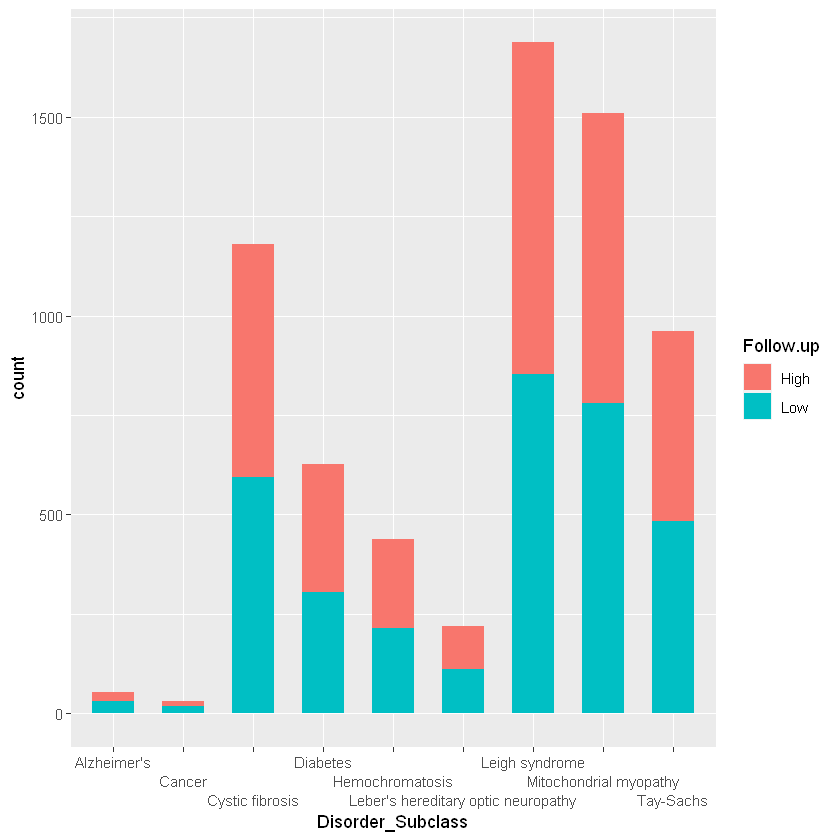

In [26]:
ggplot(data = df, aes( Disorder_Subclass ,fill = Follow.up )) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

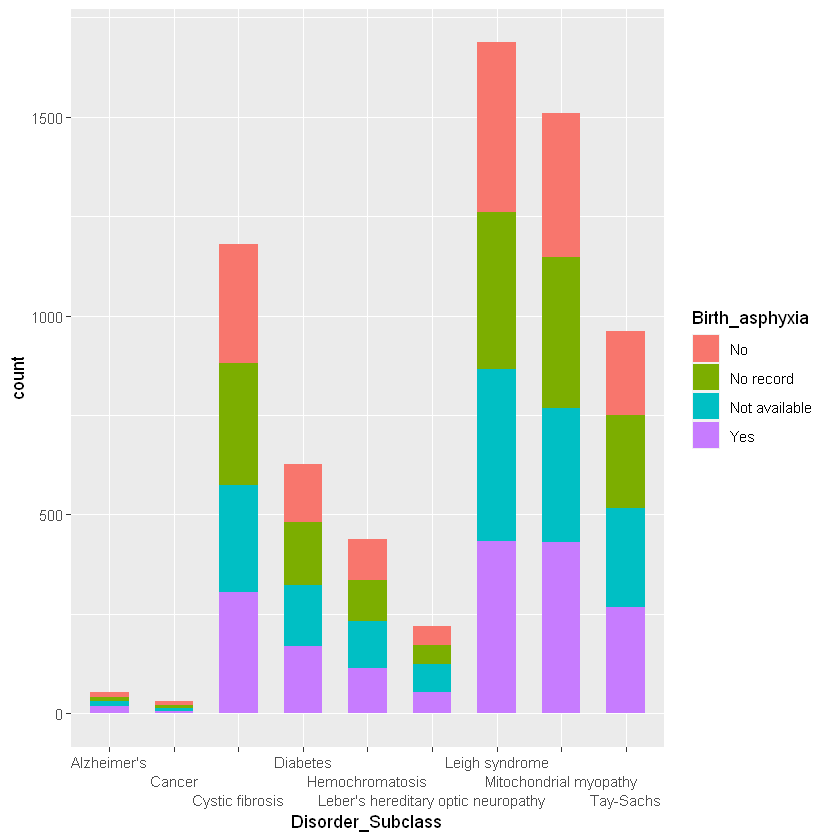

In [27]:
ggplot(data = df, aes( Disorder_Subclass ,fill = Birth_asphyxia )) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

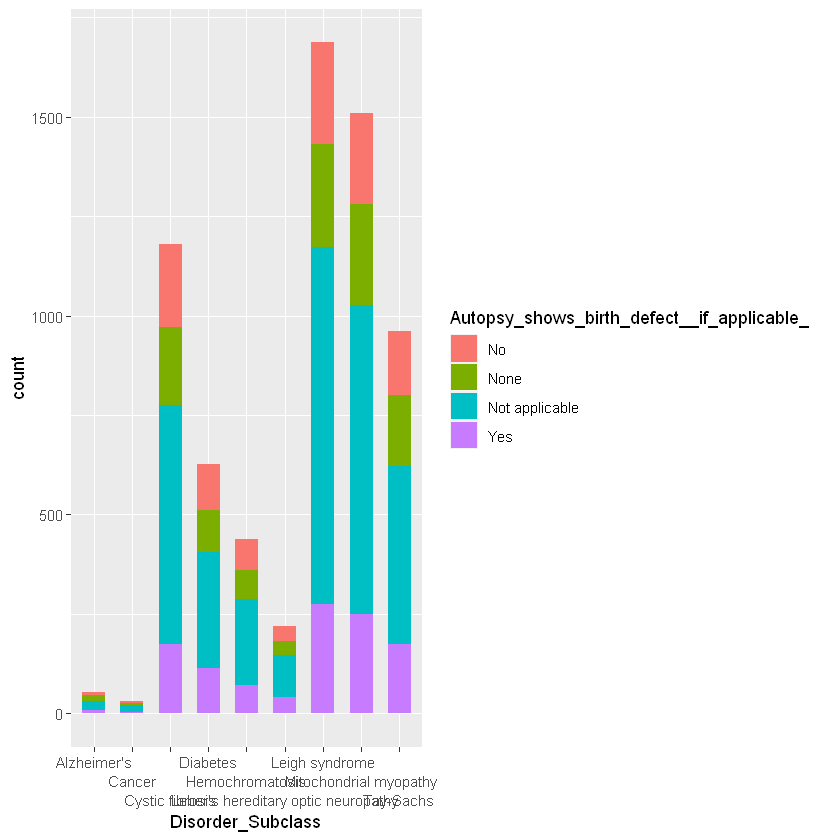

In [28]:
ggplot(data = df, aes( Disorder_Subclass ,fill = Autopsy_shows_birth_defect__if_applicable_ )) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

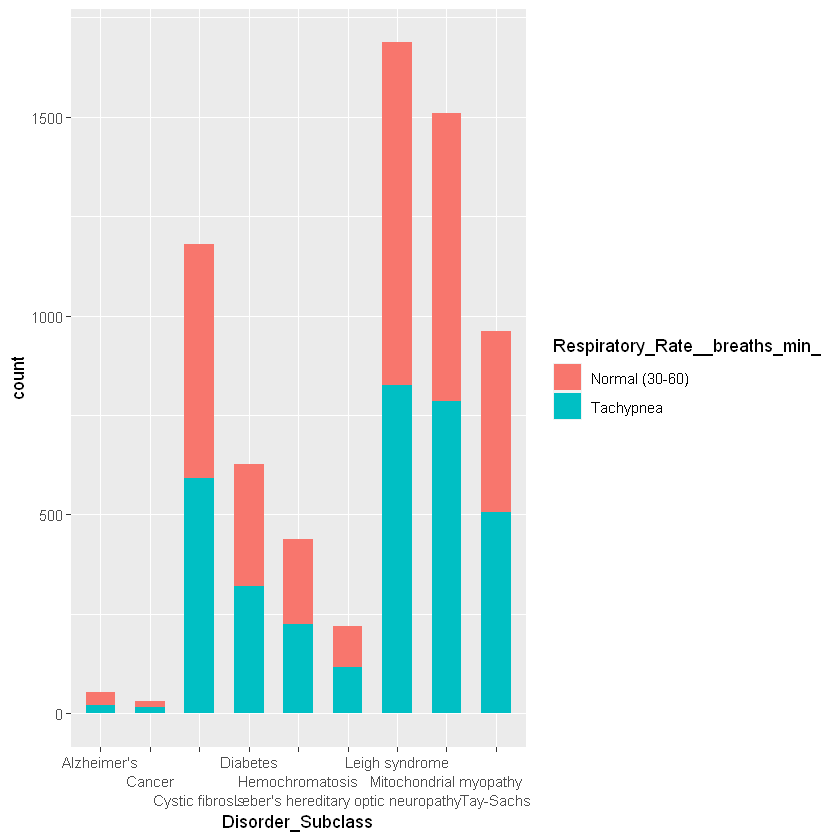

In [29]:
ggplot(data = df, aes( Disorder_Subclass ,fill = Respiratory_Rate__breaths_min_ )) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

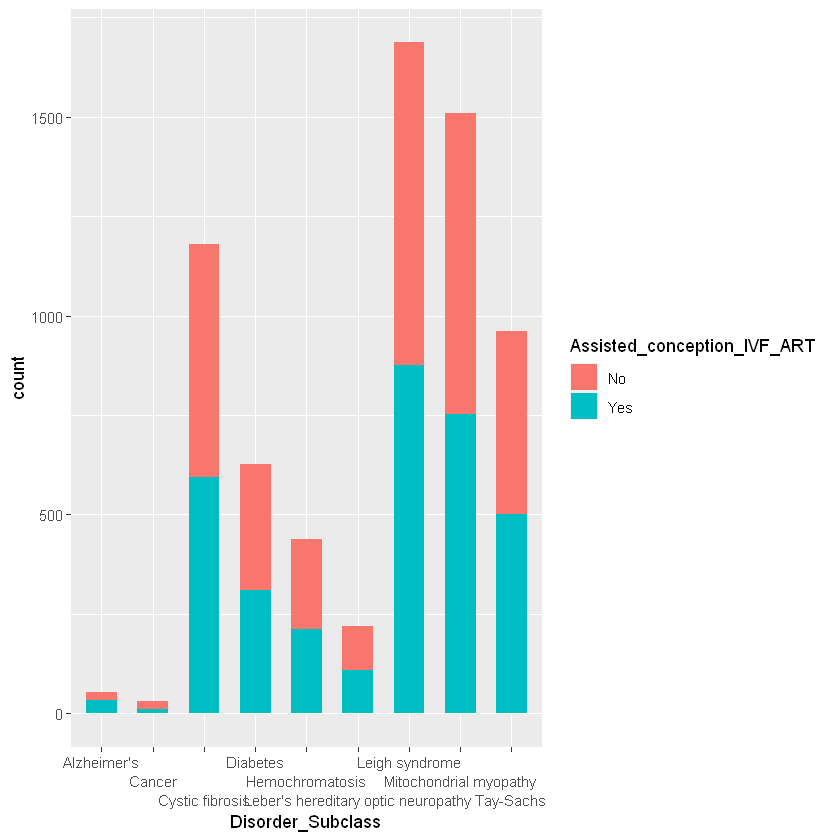

In [30]:
ggplot(data = df, aes( Disorder_Subclass ,fill = Assisted_conception_IVF_ART)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

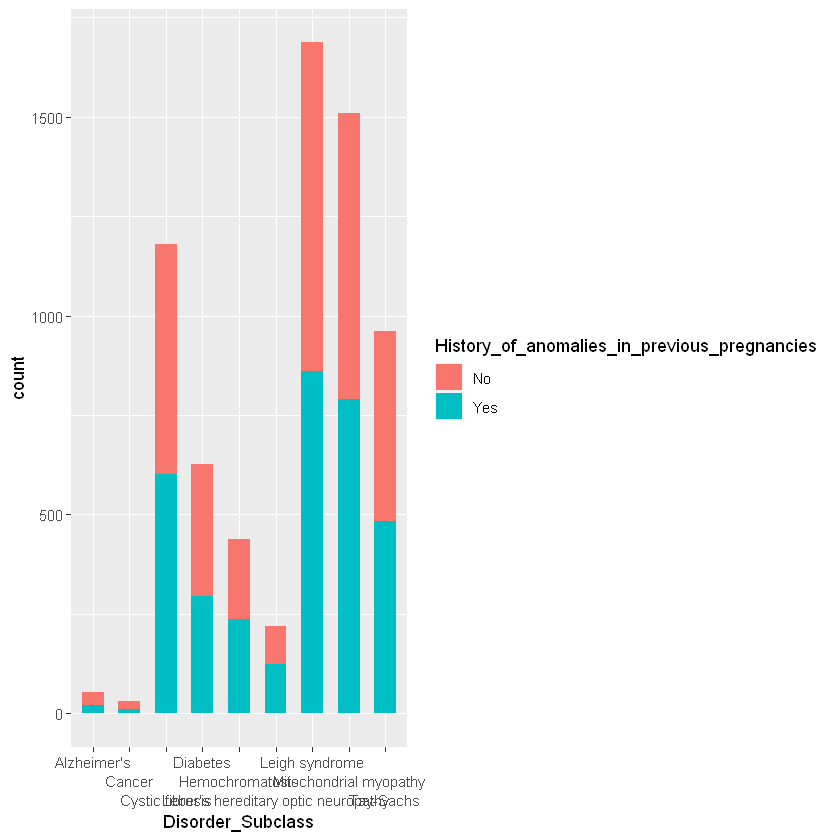

In [31]:
ggplot(data = df, aes( Disorder_Subclass ,fill = History_of_anomalies_in_previous_pregnancies)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

In [32]:
head(df)

,Patient_Age,Genes_in_mother_s_side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count__mcL_,Mother_s_age,Father_s_age,Status,Respiratory_Rate__breaths_min_,...,No._of_previous_abortion,Birth_defects,White_Blood_cell_count__thousand_per_microliter_,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Disorder_Subclass
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,...,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
1,11,No,No,Yes,No,5.209058,45,44,Alive,Tachypnea,...,0,Multiple,6.669552,slightly abnormal,1,1,1,0,1,Leigh syndrome
2,4,No,Yes,Yes,Yes,4.752272,44,42,Alive,Tachypnea,...,1,Multiple,6.397702,abnormal,0,0,1,1,1,Diabetes
3,1,Yes,Yes,No,No,4.612265,50,56,Deceased,Normal (30-60),...,0,Singular,7.995115,slightly abnormal,1,1,0,1,0,Leigh syndrome
4,6,Yes,No,Yes,No,4.620420,41,20,Alive,Tachypnea,...,3,Multiple,3.000000,slightly abnormal,1,0,1,0,1,Leigh syndrome
5,10,Yes,Yes,Yes,No,4.751452,40,57,Deceased,Normal (30-60),...,3,Singular,9.382407,abnormal,1,1,0,0,0,Mitochondrial myopathy
6,6,No,Yes,Yes,Yes,4.876896,36,48,Deceased,Tachypnea,...,1,Singular,7.370477,normal,1,0,0,0,0,Hemochromatosis


In [33]:


drop <- c("Birth_asphyxia" ,"Autopsy_shows_birth_defect__if_applicable_","Follow.up","Heart_Rate__rates_min",
          "Folic_acid_details__peri.conceptional_","H_O_serious_maternal_illness","Status", "Birth_defects",
         "Blood_test_result","Gender","Assisted_conception_IVF_ART","Respiratory_Rate__breaths_min_","History_of_anomalies_in_previous_pregnancies")
df = df[,!(names(df) %in% drop)]
dim(df)

[1] 6706   16

In [34]:
str(df)

'data.frame':	6706 obs. of  16 variables:
 $ Patient_Age                                     : int  11 4 1 6 10 6 10 4 8 1 ...
 $ Genes_in_mother_s_side                          : chr  "No" "No" "Yes" "Yes" ...
 $ Inherited_from_father                           : chr  "No" "Yes" "Yes" "No" ...
 $ Maternal_gene                                   : chr  "Yes" "Yes" "No" "Yes" ...
 $ Paternal_gene                                   : chr  "No" "Yes" "No" "No" ...
 $ Blood_cell_count__mcL_                          : num  5.21 4.75 4.61 4.62 4.75 ...
 $ Mother_s_age                                    : int  45 44 50 41 40 36 30 49 18 38 ...
 $ Father_s_age                                    : int  44 42 56 20 57 48 42 28 31 61 ...
 $ No._of_previous_abortion                        : int  0 1 0 3 3 1 0 4 0 4 ...
 $ White_Blood_cell_count__thousand_per_microliter_: num  6.67 6.4 8 3 9.38 ...
 $ Symptom_1                                       : int  1 0 1 1 1 1 1 1 1 0 ...
 $ Symptom_2          

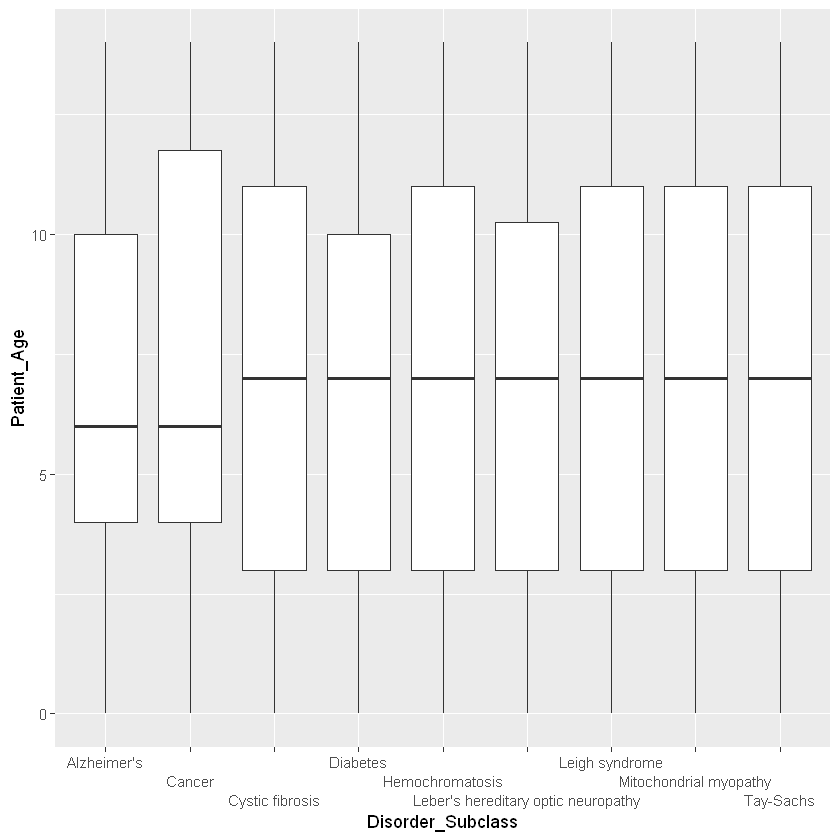

In [35]:
ggplot(df, aes(x = Disorder_Subclass, y = Patient_Age)) +
  geom_boxplot()+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

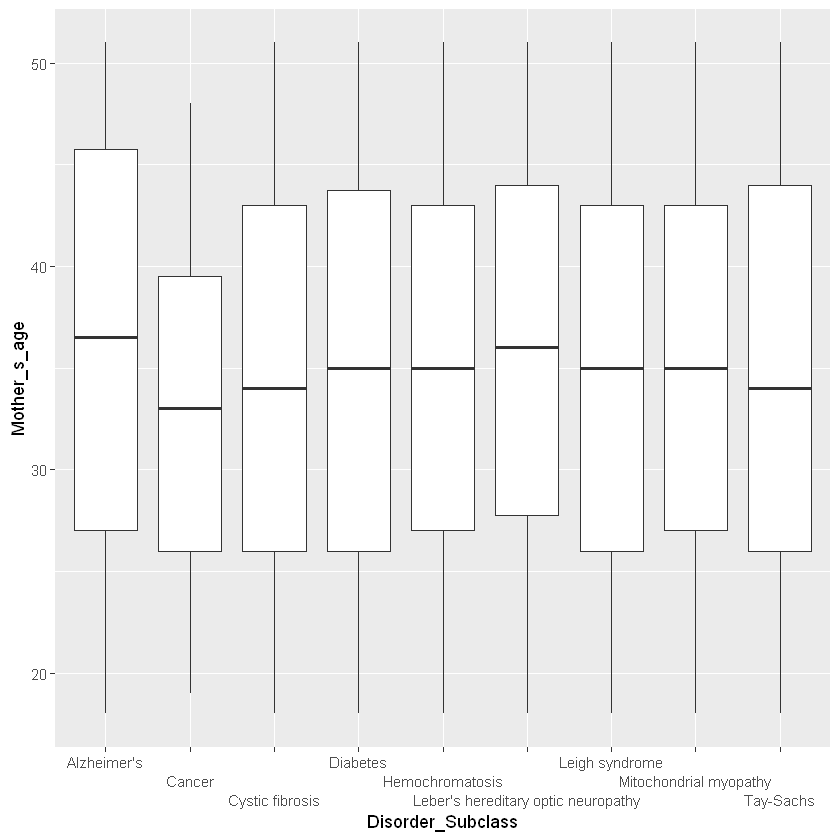

In [36]:
ggplot(df, aes(x = Disorder_Subclass, y = Mother_s_age)) +
  geom_boxplot()+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

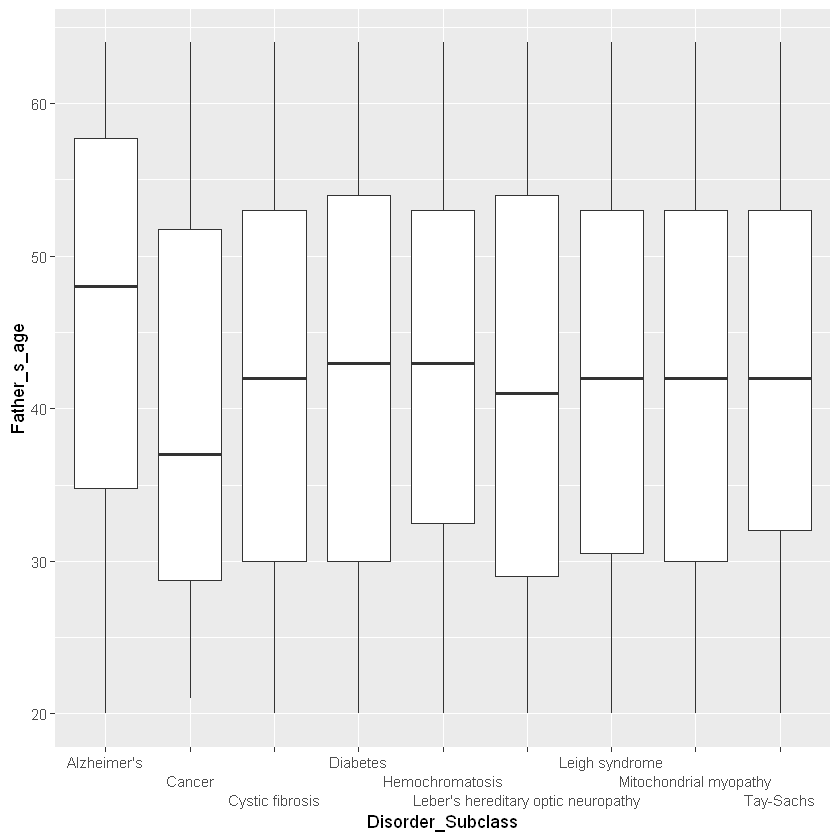

In [37]:
ggplot(df, aes(x = Disorder_Subclass, y = Father_s_age)) +
  geom_boxplot()+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

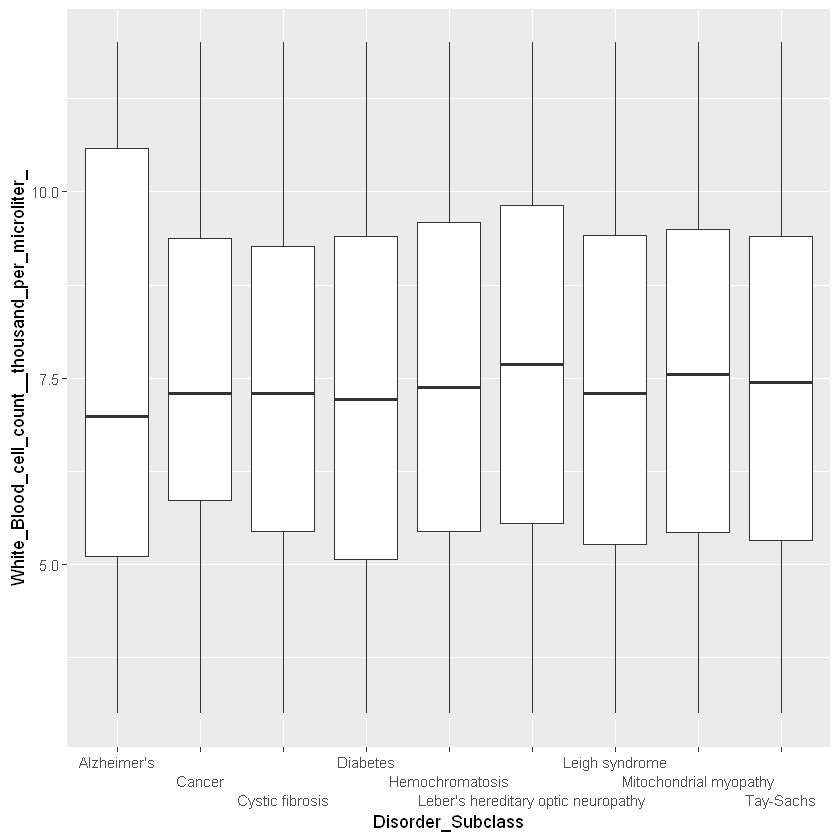

In [38]:
ggplot(df, aes(x = Disorder_Subclass, y = White_Blood_cell_count__thousand_per_microliter_)) +
  geom_boxplot()+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

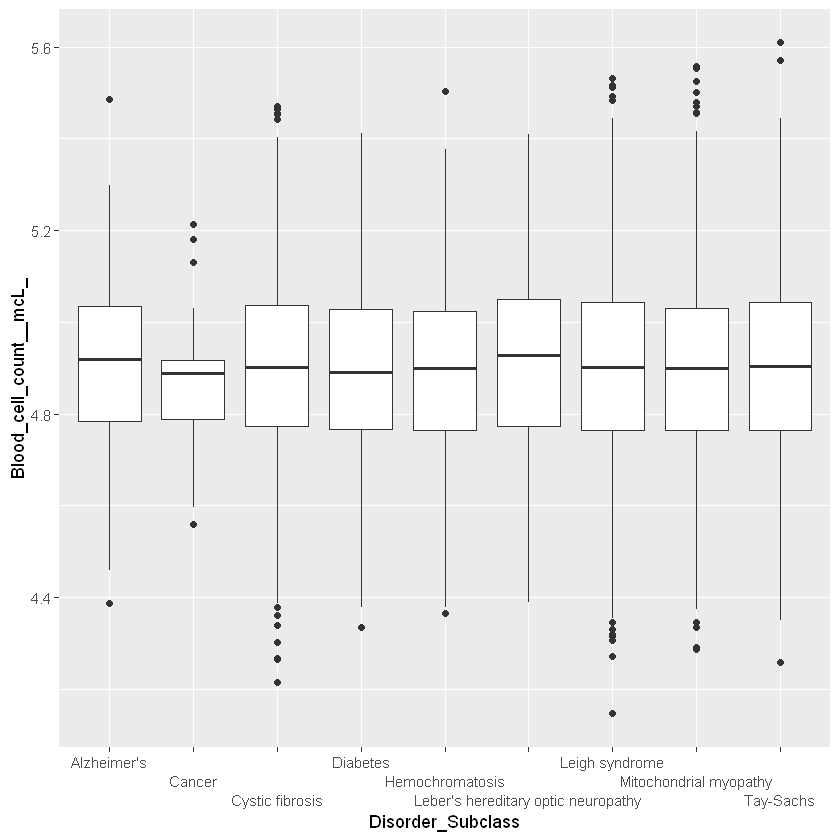

In [39]:
ggplot(df, aes(x = Disorder_Subclass, y = Blood_cell_count__mcL_)) +
  geom_boxplot()+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

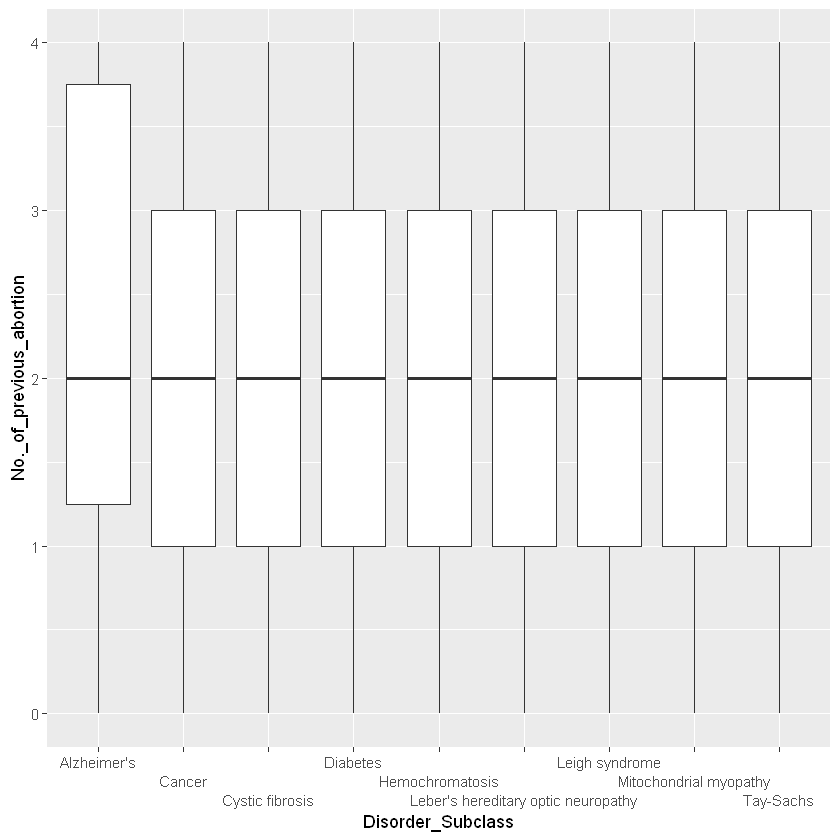

In [40]:
ggplot(df, aes(x = Disorder_Subclass, y = No._of_previous_abortion)) +
  geom_boxplot()+  scale_x_discrete(guide = guide_axis(n.dodge = 3))

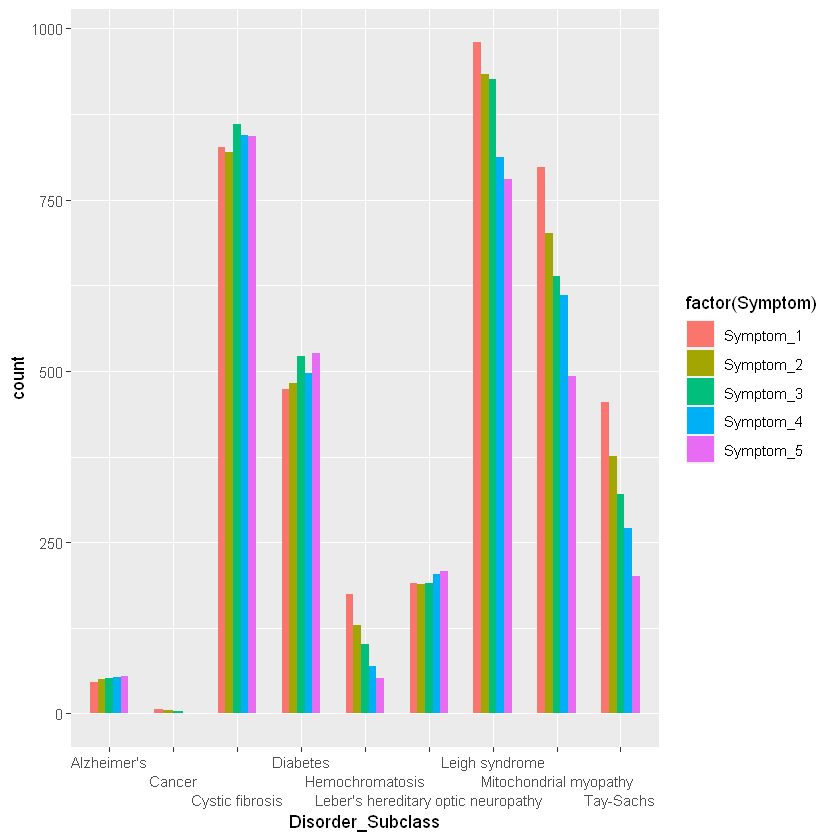

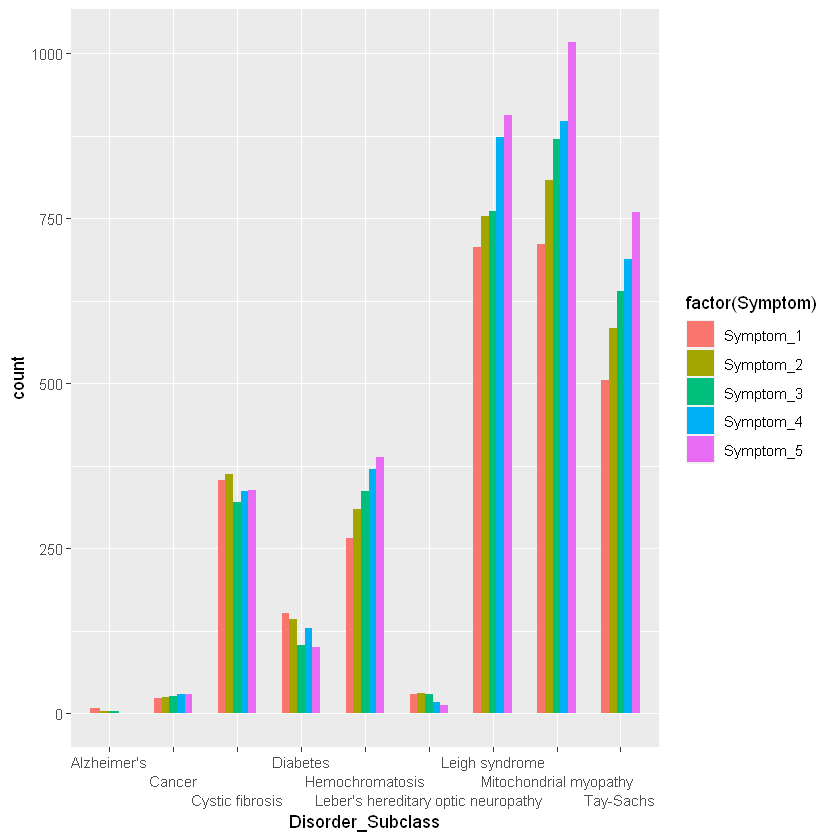

In [41]:
df_long <- df %>%
  pivot_longer(cols = starts_with("Symptom"), names_to = "Symptom", values_to = "Value")

df_filtered <- df_long %>%
  filter(Value == 1)

p1 <-ggplot(data = df_long, aes(Disorder_Subclass, fill = factor(Symptom), group = Symptom)) +
  geom_bar(data = df_filtered, position = "dodge", width = 0.6, stat = "count") +
  scale_x_discrete(guide = guide_axis(n.dodge = 3))


df_filtered <- df_long %>%
  filter(Value == 0)

p2<-ggplot(data = df_long, aes(Disorder_Subclass, fill = factor(Symptom), group = Symptom)) +
  geom_bar(data = df_filtered, position = "dodge", width = 0.6, stat = "count") +
  scale_x_discrete(guide = guide_axis(n.dodge = 3))

p1
p2

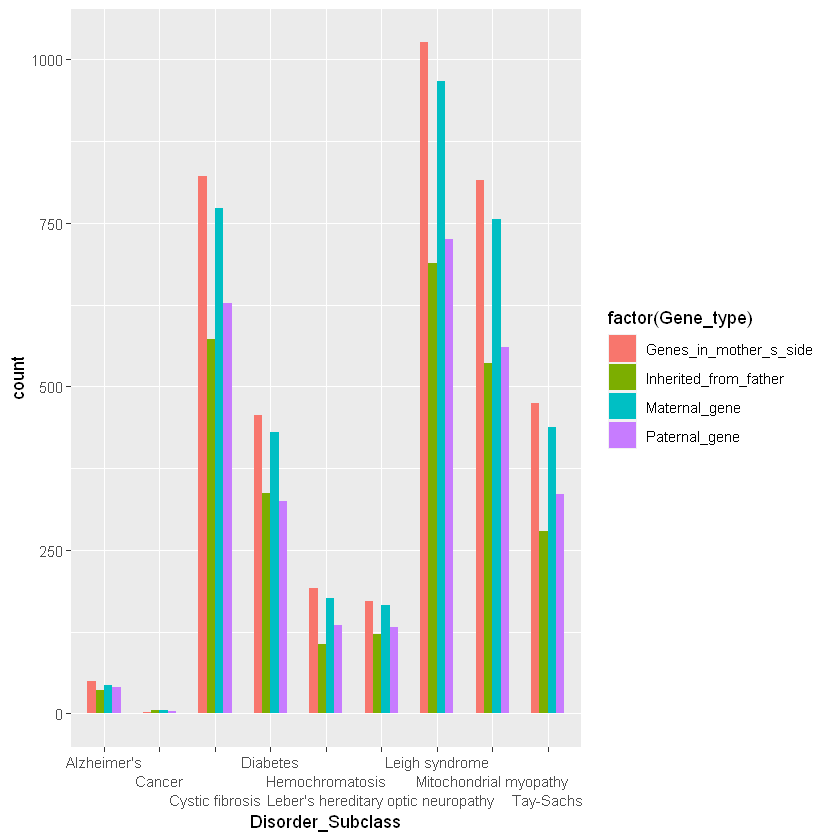

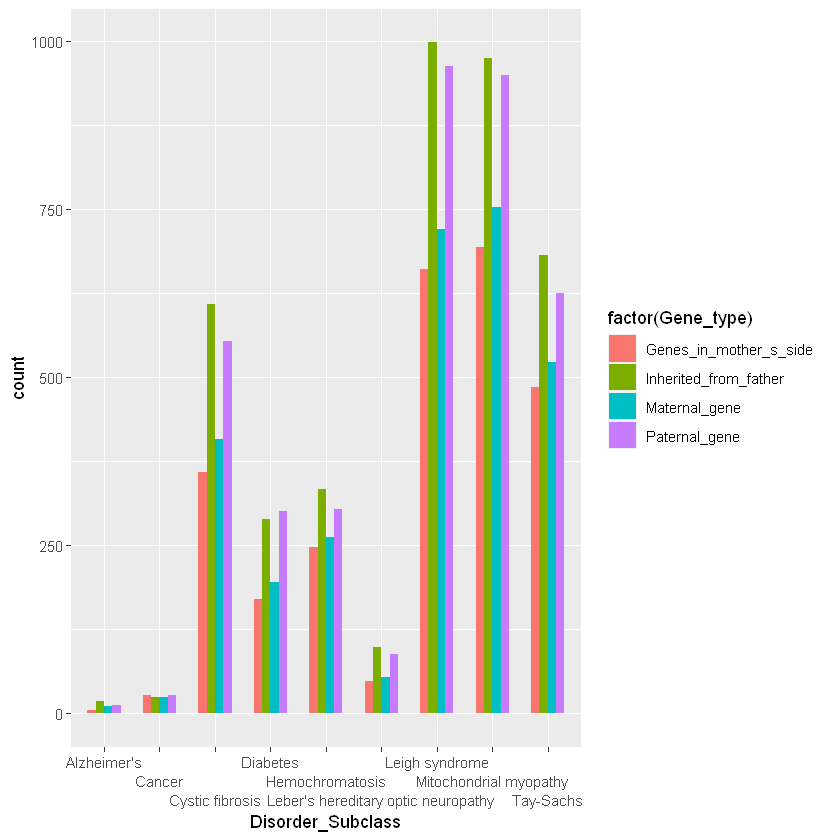

In [42]:
df_long <- df %>%
  pivot_longer(cols = c(Genes_in_mother_s_side, Inherited_from_father, Maternal_gene, Paternal_gene),
               names_to = "Gene_type", values_to = "Value")

df_long$Value <- factor(df_long$Value, levels = c("Yes", "No"))

df_filtered <- df_long %>%
  filter(Value == 'Yes')

p3<-ggplot(data = df_long, aes(Disorder_Subclass, fill = factor(Gene_type), group = Gene_type)) +
  geom_bar(data = df_filtered, position = "dodge", width = 0.6, stat = "count") +
  scale_x_discrete(guide = guide_axis(n.dodge = 3))

df_filtered <- df_long %>%
  filter(Value == 'No')

p4 <- ggplot(data = df_long, aes(Disorder_Subclass, fill = factor(Gene_type), group = Gene_type)) +
  geom_bar(data = df_filtered, position = "dodge", width = 0.6, stat = "count") +
  scale_x_discrete(guide = guide_axis(n.dodge = 3))

p3
p4

In [43]:
dim(df)

[1] 6706   16

In [44]:
str(df)

'data.frame':	6706 obs. of  16 variables:
 $ Patient_Age                                     : int  11 4 1 6 10 6 10 4 8 1 ...
 $ Genes_in_mother_s_side                          : chr  "No" "No" "Yes" "Yes" ...
 $ Inherited_from_father                           : chr  "No" "Yes" "Yes" "No" ...
 $ Maternal_gene                                   : chr  "Yes" "Yes" "No" "Yes" ...
 $ Paternal_gene                                   : chr  "No" "Yes" "No" "No" ...
 $ Blood_cell_count__mcL_                          : num  5.21 4.75 4.61 4.62 4.75 ...
 $ Mother_s_age                                    : int  45 44 50 41 40 36 30 49 18 38 ...
 $ Father_s_age                                    : int  44 42 56 20 57 48 42 28 31 61 ...
 $ No._of_previous_abortion                        : int  0 1 0 3 3 1 0 4 0 4 ...
 $ White_Blood_cell_count__thousand_per_microliter_: num  6.67 6.4 8 3 9.38 ...
 $ Symptom_1                                       : int  1 0 1 1 1 1 1 1 1 0 ...
 $ Symptom_2          